<a href="https://colab.research.google.com/github/Hari8adro/Projects/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv')
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


In [3]:
df.shape

(5000, 15)

In [4]:
df.describe()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
count,4994.000000,4865.000000,4686.000000,4792.000000,4991.000000
mean,74667.995995,49.106680,137353.817542,63058.343566,124654.377880
std,43089.045623,18.398524,69471.623020,40056.989704,55668.246494
min,25008.000000,18.000000,35005.000000,10282.410000,50000.000000
25%,39742.500000,33.000000,73485.000000,33336.742500,100000.000000
50%,60922.000000,49.000000,131833.000000,49547.945000,100000.000000
75%,98373.500000,65.000000,189054.250000,83732.352500,150000.000000
max,199923.000000,80.000000,299907.000000,199898.290000,200000.000000


In [5]:
df.tail()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
4995,N307EM82,RuPay,Education,36508.0,2023-12-29 09:22:23,Delhi,North,33.0,Female,63015.0,34192.55,50000.0,Contactless Payment Device,Friday,Yes
4996,J752EG45,American Express,Online Shopping,42920.0,2023-12-29 19:59:13,Chennai,South,NaN,Female,NaN,19680.39,100000.0,Contactless Payment Device,Friday,No
4997,S458OS59,Visa,Healthcare,33788.0,2023-12-30 07:06:38,Pune,West,56.0,Male,60868.0,33876.96,50000.0,Desktop,Saturday,No
4998,E863PD98,RuPay,Entertainment,38679.0,2023-12-30 07:50:02,Chennai,South,60.0,Male,66948.0,32988.22,50000.0,Desktop,Saturday,No
4999,D501WH15,Visa,Healthcare,34672.0,2023-12-30 11:41:36,Jaipur,North,60.0,NaN,58261.0,39412.26,50000.0,Mobile,Saturday,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns.to_list()

['Transaction_ID',
 'Card_Type',
 'Merchant_Category',
 'Transaction_Amount',
 'Transaction_DateTime',
 'Location',
 'Region',
 'Cardholder_Age',
 'Cardholder_Gender',
 'Cardholder_Monthly_Income',
 'Cardholder_Average_Spend',
 'Credit_Limit',
 'Device_Type',
 'Day_of_Week',
 'Is_Fraudulent']

In [9]:
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


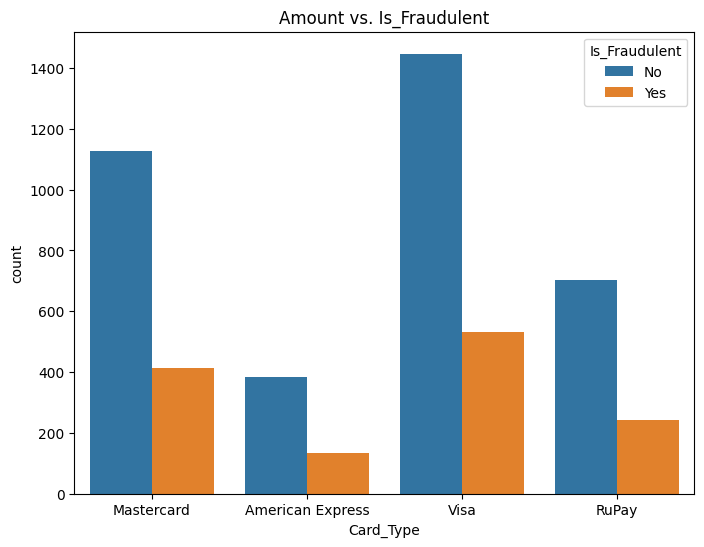

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data= df, x= 'Card_Type', hue= 'Is_Fraudulent')
plt.title('Amount vs. Is_Fraudulent')
plt.show()

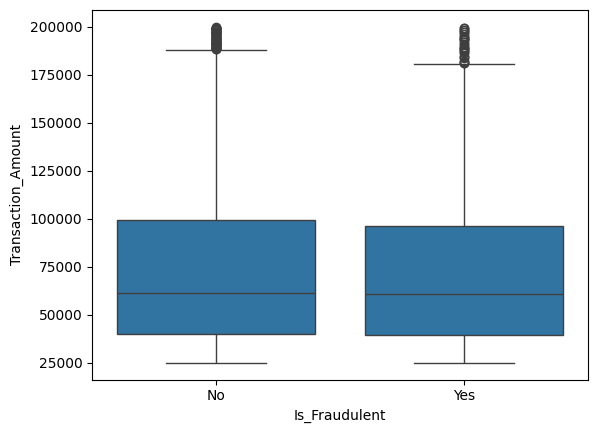

In [11]:
sns.boxplot(data= df, x= 'Is_Fraudulent', y= 'Transaction_Amount')
plt.show()

In [12]:
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


In [13]:
df.columns[df.isnull().any()].tolist()

['Card_Type',
 'Merchant_Category',
 'Transaction_Amount',
 'Cardholder_Age',
 'Cardholder_Gender',
 'Cardholder_Monthly_Income',
 'Cardholder_Average_Spend',
 'Credit_Limit',
 'Device_Type']

In [14]:
cols_to_fill = ['Card_Type',
 'Merchant_Category',
 'Transaction_Amount',
 'Cardholder_Age',
 'Cardholder_Gender',
 'Cardholder_Monthly_Income',
 'Cardholder_Average_Spend',
 'Credit_Limit',
 'Device_Type']

for col in cols_to_fill:
    df[col].fillna(df[col].mode()[0], inplace= True)

<ipython-input-14-63c7572b26fb>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace= True)


In [15]:
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,0
Merchant_Category,0
Transaction_Amount,0
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,0
Cardholder_Gender,0
Cardholder_Monthly_Income,0


In [16]:
categorical_cols =  df.select_dtypes(include= 'object').columns.to_list()
categorical_cols

['Transaction_ID',
 'Card_Type',
 'Merchant_Category',
 'Transaction_DateTime',
 'Location',
 'Region',
 'Cardholder_Gender',
 'Device_Type',
 'Day_of_Week',
 'Is_Fraudulent']

In [17]:
numerical_cols = df.select_dtypes(exclude= 'object').columns.to_list()
numerical_cols

['Transaction_Amount',
 'Cardholder_Age',
 'Cardholder_Monthly_Income',
 'Cardholder_Average_Spend',
 'Credit_Limit']

In [18]:
from scipy.stats import zscore

In [19]:
z_score = np.abs(zscore(df[numerical_cols]))

outlier_z = (z_score > 3).any(axis= 1)

df = df[~outlier_z]
print(df.shape)

(4937, 15)


In [20]:
df.duplicated().sum()

0

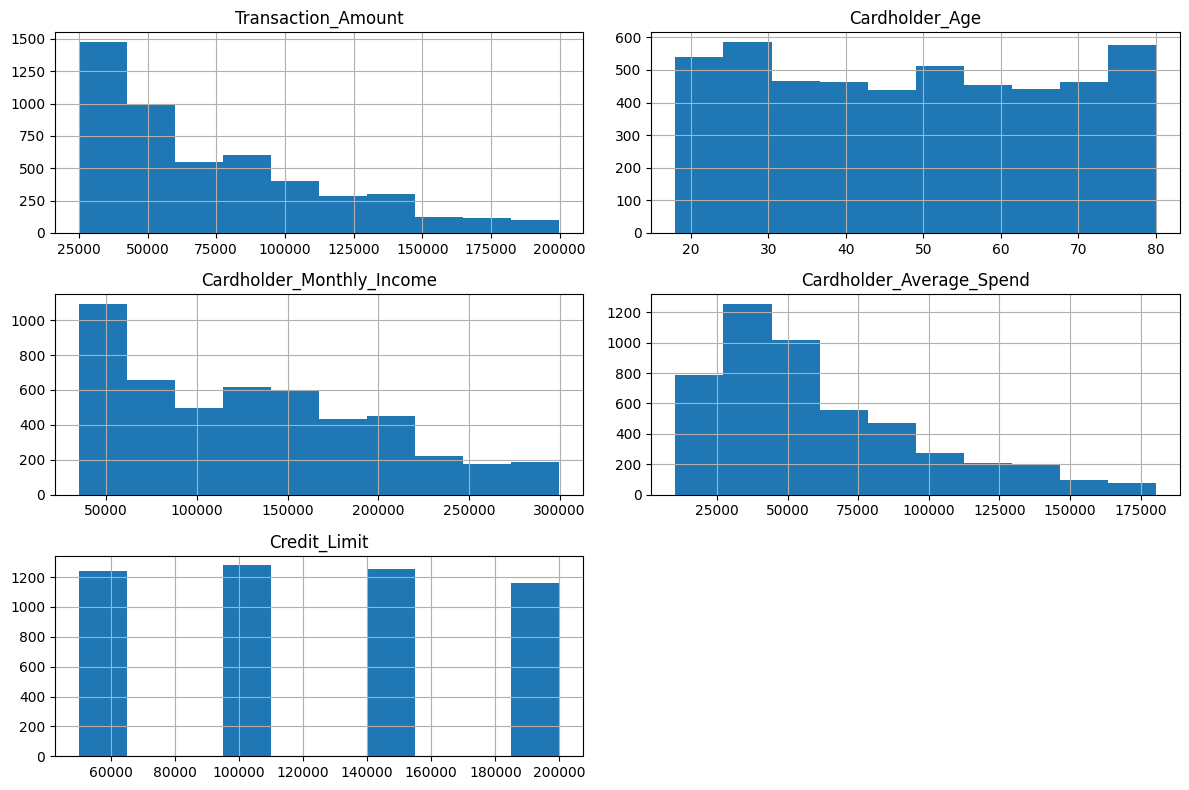

In [21]:
df.hist(numerical_cols,figsize=(12,8))
plt.tight_layout()
plt.show()

In [22]:
list(enumerate(numerical_cols))

[(0, 'Transaction_Amount'),
 (1, 'Cardholder_Age'),
 (2, 'Cardholder_Monthly_Income'),
 (3, 'Cardholder_Average_Spend'),
 (4, 'Credit_Limit')]

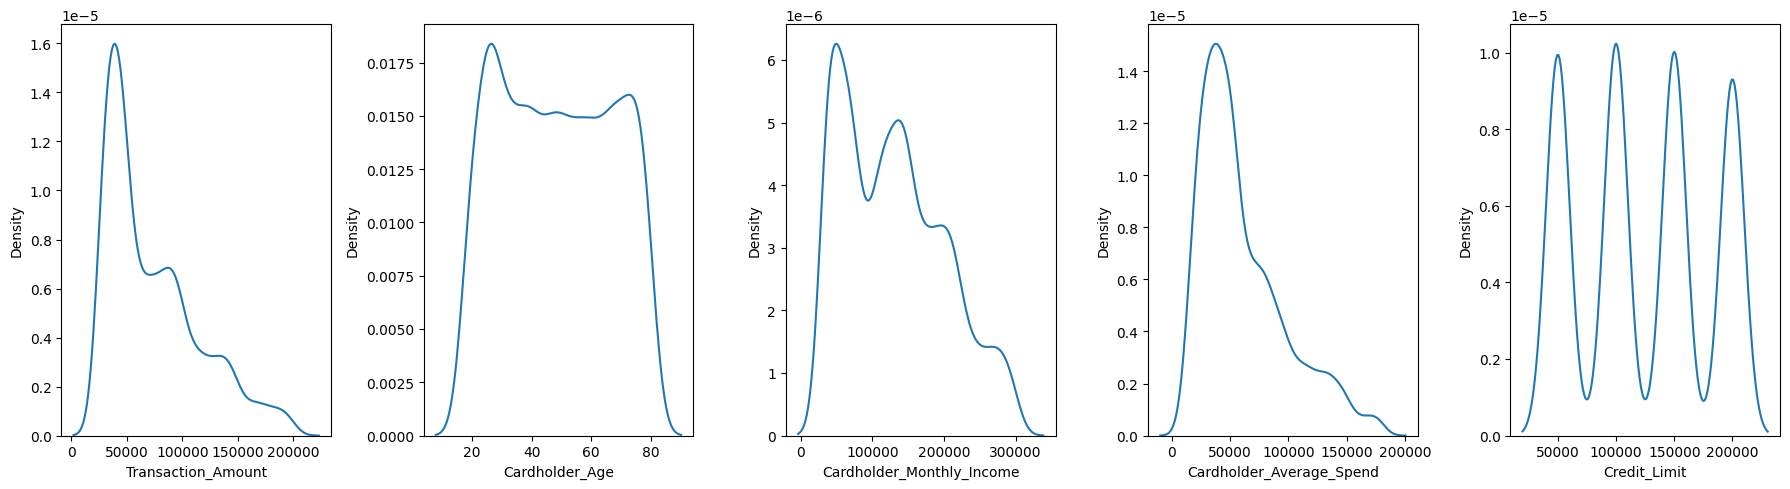

In [23]:
fig, axes= plt.subplots(ncols= 5, figsize= (18,5))
for index, col in enumerate(numerical_cols):
    sns.kdeplot(data= df, x= col, ax= axes[index])
plt.tight_layout()
plt.show()

In [24]:
skewness = df[numerical_cols].skew()
skewness

,0
Transaction_Amount,0.983962
Cardholder_Age,0.043520
Cardholder_Monthly_Income,0.464253
Cardholder_Average_Spend,1.085382
Credit_Limit,0.032457


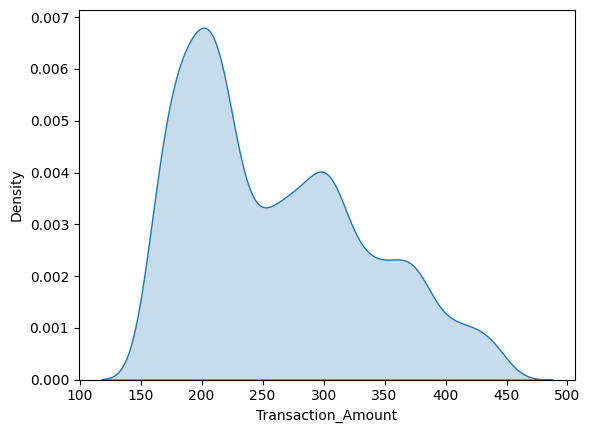

In [25]:
amt_sqrt = df['Transaction_Amount']**0.5
sns.kdeplot(x= amt_sqrt, fill= True)
plt.show()

In [26]:
categorical_cols

['Transaction_ID',
 'Card_Type',
 'Merchant_Category',
 'Transaction_DateTime',
 'Location',
 'Region',
 'Cardholder_Gender',
 'Device_Type',
 'Day_of_Week',
 'Is_Fraudulent']

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,4358,1,7,27214.0,0,10,0,23.0,0,94632.0,36369.65,100000.0,4,6,0
1,4091,0,5,83956.0,1,12,3,49.0,1,148118.0,89179.12,150000.0,1,0,0
2,3288,3,6,193280.0,2,10,0,26.0,1,210921.0,106668.60,200000.0,1,2,0
3,3734,2,4,167381.0,3,12,3,52.0,0,148070.0,173155.52,200000.0,1,2,1
4,1900,2,5,81170.0,4,8,1,37.0,0,174470.0,52713.09,200000.0,2,2,0


# **Feature Selection:**

In [28]:
numerical_cols

['Transaction_Amount',
 'Cardholder_Age',
 'Cardholder_Monthly_Income',
 'Cardholder_Average_Spend',
 'Credit_Limit']

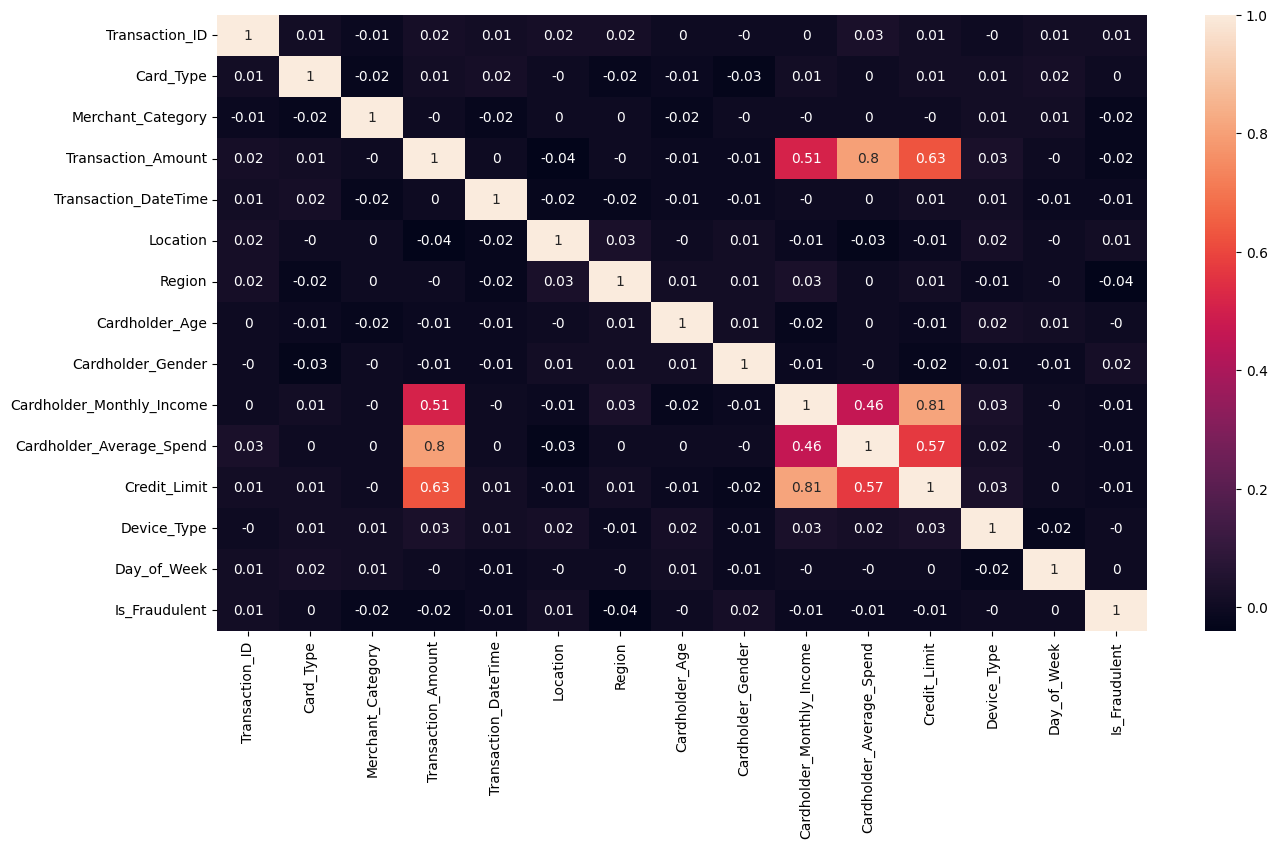

In [29]:
plt.figure(figsize= (15,8))
sns.heatmap(df.corr().round(2),annot= True)
plt.show()

In [30]:
x = df.drop(columns=['Transaction_ID','Is_Fraudulent'])
y = df['Is_Fraudulent']

# **Split data into training and testing:**

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

## **Feature Scaling:**

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_cols = x.select_dtypes(include= ['int64','float64']).columns

x_train_num = x_train[numerical_cols]
x_test_num = x_test[numerical_cols]

In [33]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_num)
x_test_scaled = scaler.transform(x_test_num)

# **Build the Machine Learning Model:**

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
from sklearn.metrics import f1_score

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC()
}

for name, clf in classifiers.items():
    clf.fit(x_train_scaled, y_train)
    y_pred = clf.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"F1-score: {f1}")
    print("-" * 20)

Classifier: Logistic Regression
Accuracy: 0.7155870445344129
F1-score: 0.0
--------------------
Classifier: Naive Bayes
Accuracy: 0.7155870445344129
F1-score: 0.0
--------------------
Classifier: Decision Tree
Accuracy: 0.5860323886639676
F1-score: 0.3079526226734349
--------------------
Classifier: Random Forest
Accuracy: 0.7125506072874493
F1-score: 0.013888888888888888
--------------------
Classifier: K-Nearest Neighbors
Accuracy: 0.6477732793522267
F1-score: 0.1553398058252427
--------------------
Classifier: SVM
Accuracy: 0.7155870445344129
F1-score: 0.0
--------------------


In [36]:
from sklearn.metrics import accuracy_score, f1_score

results = []
for name, clf in classifiers.items():
    y_pred = clf.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, accuracy, f1])

results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'F1-score'])

best_classifier = results_df.loc[results_df['F1-score'].idxmax()]
print(f"The best classifier is: {best_classifier['Classifier']} with F1-score: {best_classifier['F1-score']}")

best_clf_name = best_classifier['Classifier']
for name, clf in classifiers.items():
  if name == best_clf_name:
    best_clf = clf
    break

The best classifier is: Decision Tree with F1-score: 0.3079526226734349


In [37]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = best_clf.predict(x_test_scaled)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Confusion Matrix:
 [[488 219]
 [190  91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.69      0.70       707
           1       0.29      0.32      0.31       281

    accuracy                           0.59       988
   macro avg       0.51      0.51      0.51       988
weighted avg       0.60      0.59      0.59       988



In [38]:
y_pred = best_clf.predict(x_test_scaled)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

print("\nInterpretation of the results:")
print("The confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions.")
print("The classification report provides precision, recall, F1-score, and support for each class (fraudulent and non-fraudulent).")

accuracy = accuracy_score(y_test, y_pred)
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy}")
print(f"Precision (Fraudulent): {precision}")
print(f"Recall (Fraudulent): {recall}")
print(f"F1-score: {f1}")

print("\nFurther analysis:")
print("- High accuracy indicates good overall performance.")
print("- Precision measures the accuracy of positive predictions. A high precision for the fraudulent class means that when the model predicts fraud, it is likely to be correct.")
print("- Recall measures the ability of the model to correctly identify all positive instances. A high recall for the fraudulent class means that the model is good at catching fraudulent transactions.")
print("- The F1-score balances precision and recall. A high F1-score suggests good overall performance in detecting fraudulent transactions.")
print("- Examine the confusion matrix to see the specific counts of true positives, true negatives, false positives, and false negatives, which can give further insight into the model's strengths and weaknesses.")


Confusion Matrix:
 [[488 219]
 [190  91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.69      0.70       707
           1       0.29      0.32      0.31       281

    accuracy                           0.59       988
   macro avg       0.51      0.51      0.51       988
weighted avg       0.60      0.59      0.59       988


Interpretation of the results:
The confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions.
The classification report provides precision, recall, F1-score, and support for each class (fraudulent and non-fraudulent).

Accuracy: 0.5860323886639676
Precision (Fraudulent): 0.29354838709677417
Recall (Fraudulent): 0.3238434163701068
F1-score: 0.3079526226734349

Further analysis:
- High accuracy indicates good overall performance.
- Precision measures the accuracy of positive predictions. A high precision for the fraudulent class means that when t

ROC AUC Score: 0.5070419344933985


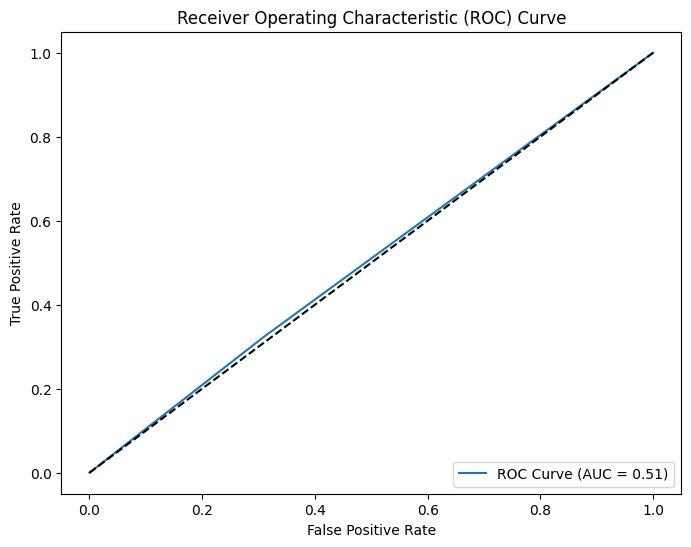


Interpretation of ROC AUC and ROC Curve:
- ROC AUC Score measures the model's ability to distinguish between fraudulent and non-fraudulent transactions. A score closer to 1 indicates better performance.
- The ROC curve visually represents the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) at various classification thresholds.
- The area under the ROC curve (AUC) quantifies the overall performance. A larger AUC indicates better model performance.

Further analysis based on ROC curve and AUC:
- Analyze the ROC curve's shape to understand the model's performance across different threshold levels. An ideal curve would be close to the top-left corner.
- Investigate specific points on the ROC curve to see the trade-offs between true positive rate and false positive rate.
- Choose an appropriate threshold based on business requirements, balancing the cost of false positives and false negatives.


In [39]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = best_clf.predict_proba(x_test_scaled)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("\nInterpretation of ROC AUC and ROC Curve:")
print("- ROC AUC Score measures the model's ability to distinguish between fraudulent and non-fraudulent transactions. A score closer to 1 indicates better performance.")
print("- The ROC curve visually represents the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) at various classification thresholds.")
print("- The area under the ROC curve (AUC) quantifies the overall performance. A larger AUC indicates better model performance.")

print("\nFurther analysis based on ROC curve and AUC:")
print("- Analyze the ROC curve's shape to understand the model's performance across different threshold levels. An ideal curve would be close to the top-left corner.")
print("- Investigate specific points on the ROC curve to see the trade-offs between true positive rate and false positive rate.")
print("- Choose an appropriate threshold based on business requirements, balancing the cost of false positives and false negatives.")
